Import Libraries

In [391]:
import pandas as pd
import numpy as np

# Import Data

In [392]:
load_data_backup = pd.read_csv('loan_data_2015.csv')

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/709813158.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  load_data_backup = pd.read_csv('loan_data_2015.csv')


# Explore Data

In [393]:
loan_data = load_data_backup.copy()

In [394]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68444620   73334399      35000        35000          35000.0   60 months   
1  68547583   73437441       8650         8650           8650.0   36 months   
2  67849662   72708407       4225         4225           4225.0   36 months   
3  68506885   73396712      10000        10000          10000.0   60 months   
4  68341763   72928789      20000        20000          20000.0   60 months   

   int_rate  installment grade sub_grade                emp_title emp_length  \
0     11.99       778.38     C        C1  Foreign Service Officer  10+ years   
1      5.32       260.50     A        A1     Associate Consultant   < 1 year   
2     14.85       146.16     C        C5                 mechanic    5 years   
3     11.99       222.40     C        C1      CARDIOVASCULAR TECH  10+ years   
4     10.78       432.66     B        B4             truck driver  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0       MORTGAGE    128000.0     Source Verified  Dec-15      Issued   
1       MORTGAGE    100000.0        Not Verified  Dec-15      Issued   
2           RENT     35000.0     Source Verified  Dec-15      Issued   
3           RENT     42500.0        Not Verified  Dec-15      Issued   
4       MORTGAGE     63000.0        Not Verified  Dec-15      Issued   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
1          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
2          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
3          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
4          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose                    title zip_code addr_state    dti  \
0    home_improvement         Home improvement    200xx         DC   6.46   
1         credit_card  Credit card refinancing    462xx         IN   7.28   
2  debt_consolidation       Debt consolidation    672xx         KS  15.22   
3  debt_consolidation       Debt consolidation    460xx         IN  31.04   
4    home_improvement                      NaN    605xx         IL  10.78   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0          0.0           Feb-90             0.0                    46.0   
1          0.0           Jul-01             0.0                     NaN   
2          2.0           Jul-11             0.0                    18.0   
3          0.0           Dec-98             1.0                     NaN   
4          0.0           Aug-00             0.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN      17.0      0.0      14277        27.4   
1                     NaN      15.0      0.0       7158        26.7   
2                     NaN       6.0      0.0       1058        24.6   
3                     NaN      10.0      0.0       5812        40.9   
4                     NaN       6.0      0.0       7869        56.2   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0       46.0                   w    35000.0        35000.0          0.0   
1       24.0                   w     8650.0         8650.0          0.0   
2        6.0                   w     4225.0         4225.0          0.0   
3       23.0                   w    10000.0        10000.0          0.0   
4       18.0                   w    20000.0        20000.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   
1              0.0              0.0            0.0                 0.0   
2              0.0              0.0            0.0                 0.0   
3              0.0              0.0            0.0                 0.0   
4              0.0       

In [395]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [396]:
loan_data_defaults = loan_data[loan_data['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).

In [397]:
loan_data_defaults.shape

(2773, 74)

In [398]:
pd.options.display.max_rows = None

In [399]:
loan_data_defaults.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                       203
emp_length                      203
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                           2773
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

# Independent Variables

We don't need here to understand the link between the input data and the output, so we don't need to transform variables to Dummies

## Missing Values

In [400]:
loan_data_defaults['emp_length'].unique()

array(['1 year', '7 years', '6 years', '10+ years', nan, '8 years',
       '9 years', '3 years', '4 years', '< 1 year', '2 years', '5 years'],
      dtype=object)

In [401]:
loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length'].fillna(str(0))

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/1895588624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length'].fillna(str(0))


In [402]:
loan_data_defaults['emp_length_int'].unique()

array(['1 year', '7 years', '6 years', '10+ years', '0', '8 years',
       '9 years', '3 years', '4 years', '< 1 year', '2 years', '5 years'],
      dtype=object)

In [403]:
loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length_int'].str.replace('\+ years', '')
loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length_int'].str.replace('< 1 year', str(0))
loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length_int'].str.replace('n/a',  str(0))
loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length_int'].str.replace(' years', '')
loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length_int'].str.replace(' year', '')

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/3998202382.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length_int'].str.replace('\+ years', '')
/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/3998202382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['emp_length_int'] = loan_data_defaults['emp_length_int'].str.replace('\+ years', '')
/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/3998202382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [404]:
loan_data_defaults['emp_length_int'].unique()

array(['1', '7', '6', '10', '0', '8', '9', '3', '4', '2', '5'],
      dtype=object)

In [405]:
type(loan_data_defaults['emp_length_int'].iloc[0])

str

In [406]:
loan_data_defaults['emp_length_int'] = pd.to_numeric(loan_data_defaults['emp_length_int'])

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/1385963514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['emp_length_int'] = pd.to_numeric(loan_data_defaults['emp_length_int'])


In [407]:
type(loan_data_defaults['emp_length_int'].iloc[0])

numpy.int64

In [408]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/1935142453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)


In [409]:
#loan_data_defaults['mths_since_last_delinq'].fillna(loan_data_defaults['mths_since_last_delinq'].max() + 12, inplace=True)

In [410]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/4107388959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)


In [411]:
# We will need the following variables
# annual_inc
# delinq_2yrs
# inq_last_6mths
# open_acc
# pub_rec 
# total_acc 
# acc_now_delinq
# total_rev_hi_lim
# emp_length_int

In [412]:
loan_data_defaults['total_rev_hi_lim'].fillna(loan_data_defaults['funded_amnt'], inplace = True)

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/560690760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['total_rev_hi_lim'].fillna(loan_data_defaults['funded_amnt'], inplace = True)


In [413]:
loan_data_defaults['total_rev_hi_lim'].isnull().sum()

0

In [414]:
loan_data_defaults['annual_inc'].fillna(loan_data_defaults['annual_inc'].mean(), inplace = True)

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/3448057234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['annual_inc'].fillna(loan_data_defaults['annual_inc'].mean(), inplace = True)


In [415]:
loan_data_defaults['delinq_2yrs'].fillna(0, inplace = True)
loan_data_defaults['acc_now_delinq'].fillna(0, inplace = True)
loan_data_defaults['total_acc'].fillna(0, inplace = True)
loan_data_defaults['pub_rec'].fillna(0, inplace = True)
loan_data_defaults['open_acc'].fillna(0, inplace = True)
loan_data_defaults['inq_last_6mths'].fillna(0, inplace = True)
loan_data_defaults['emp_length_int'].fillna(0, inplace = True)

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/2665594278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['delinq_2yrs'].fillna(0, inplace = True)
/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/2665594278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['acc_now_delinq'].fillna(0, inplace = True)
/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/2665594278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

## Preprocessing few continuous variables

In [416]:
loan_data_defaults['term'].unique()  # This one is discrete

array([' 36 months', ' 60 months'], dtype=object)

In [417]:
loan_data_defaults['term_int'] = loan_data_defaults['term'].str.replace(' 36 months','36')
loan_data_defaults['term_int'] = loan_data_defaults['term_int'].str.replace(' 60 months','60')
loan_data_defaults['term_int'] = pd.to_numeric(loan_data_defaults['term_int'])
loan_data_defaults['term_int'].unique()

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/360298353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['term_int'] = loan_data_defaults['term'].str.replace(' 36 months','36')
/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/360298353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['term_int'] = loan_data_defaults['term_int'].str.replace(' 60 months','60')
/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/3602983

array([36, 60])

In [418]:
# It's string and we've to turn it to date
type(loan_data_defaults['earliest_cr_line'].iloc[0]) 

str

In [419]:
loan_data_defaults['earliest_cr_line_date']  = pd.to_datetime(loan_data_defaults['earliest_cr_line'], format= '%b-%y' )
# We've date passing error since date like '68' is converted as '2068'

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/2637151942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['earliest_cr_line_date']  = pd.to_datetime(loan_data_defaults['earliest_cr_line'], format= '%b-%y' )


In [420]:
# Conventionnally, we prefered to work with month
loan_data_defaults['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data_defaults['earliest_cr_line_date'])/ np.timedelta64(1, 'M')))

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/3793160973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data_defaults['earliest_cr_line_date'])/ np.timedelta64(1, 'M')))


In [421]:
loan_data_defaults['mths_since_earliest_cr_line'].describe()

count    2773.000000
mean      215.479264
std        95.077830
min      -596.000000
25%       159.000000
50%       201.000000
75%       256.000000
max       581.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [422]:
loan_data_defaults.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data_defaults['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
287970           Aug-67            2067-08-01                       -596.0
330543           Dec-64            2064-12-01                       -564.0
381247           Mar-63            2063-03-01                       -543.0
384048           Jul-65            2065-07-01                       -571.0
403094           Jan-62            2062-01-01                       -529.0
404235           Oct-62            2062-10-01                       -538.0
415244           Nov-65            2065-11-01                       -575.0

In [423]:
loan_data_defaults['mths_since_earliest_cr_line'][loan_data_defaults['mths_since_earliest_cr_line'] < 0] = loan_data_defaults['mths_since_earliest_cr_line'].max() 

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/2992946954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_earliest_cr_line'][loan_data_defaults['mths_since_earliest_cr_line'] < 0] = loan_data_defaults['mths_since_earliest_cr_line'].max()


In [424]:
min(loan_data_defaults['mths_since_earliest_cr_line'])

68.0

In [425]:
loan_data_defaults['mths_since_earliest_cr_line'].fillna(0, inplace = True)

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/2493173793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_earliest_cr_line'].fillna(0, inplace = True)


In [426]:
loan_data_defaults['term_int'].describe()

count    2773.000000
mean       45.909845
std        11.818698
min        36.000000
25%        36.000000
50%        36.000000
75%        60.000000
max        60.000000
Name: term_int, dtype: float64

In [427]:
type(loan_data_defaults['issue_d'].iloc[0])

str

In [428]:
loan_data_defaults['issue_date']  = pd.to_datetime(loan_data_defaults['issue_d'], format= '%b-%y' )

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/2716509067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['issue_date']  = pd.to_datetime(loan_data_defaults['issue_d'], format= '%b-%y' )


In [429]:
loan_data_defaults['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data_defaults['issue_date'])/ np.timedelta64(1, 'M')))

# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data_defaults['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/3042474848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data_defaults['issue_date'])/ np.timedelta64(1, 'M')))


count    2773.000000
mean       33.183556
std         1.790182
min        27.000000
25%        32.000000
50%        34.000000
75%        35.000000
max        35.000000
Name: mths_since_issue_d, dtype: float64

In [430]:
loan_data_defaults['issue_date'].describe()

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/3458569627.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loan_data_defaults['issue_date'].describe()


count                    2773
unique                      9
top       2015-01-01 00:00:00
freq                      911
first     2015-01-01 00:00:00
last      2015-09-01 00:00:00
Name: issue_date, dtype: object

## Preprocessing few discrete variables

In [431]:
loan_data_defaults_dummies = [pd.get_dummies(loan_data_defaults['grade'], prefix ='grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data_defaults['sub_grade'], prefix ='sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data_defaults['home_ownership'], prefix ='home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data_defaults['verification_status'], prefix ='verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data_defaults['loan_status'], prefix ='loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data_defaults['purpose'], prefix ='purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data_defaults['addr_state'], prefix ='addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data_defaults['initial_list_status'], prefix ='initial_list_status', prefix_sep = ':')]

In [432]:
loan_data_defaults_dummies

[        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
 136692        0        0        1        0        0        0        0
 141787        0        0        1        0        0        0        0
 142644        0        1        0        0        0        0        0
 146011        0        1        0        0        0        0        0
 164645        0        0        0        0        1        0        0
 165845        0        0        1        0        0        0        0
 165912        0        1        0        0        0        0        0
 165945        0        0        0        1        0        0        0
 168626        0        0        1        0        0        0        0
 168684        0        0        0        0        1        0        0
 173117        0        0        0        1        0        0        0
 175661        1        0        0        0        0        0        0
 180051        0        0        0        0        1        0        0
 18131

In [433]:
loan_data_defaults_dummies = pd.concat(loan_data_defaults_dummies, axis = 1)

In [434]:
loan_data_defaults = pd.concat([loan_data_defaults, loan_data_defaults_dummies], axis = 1)

In [435]:
loan_data_defaults.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [436]:
loan_data_defaults.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=189)

# Dependent Variables

In [437]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

In [438]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    2773.000000
mean        0.022262
std         0.079763
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.218959
Name: recovery_rate, dtype: float64

In [439]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

In [440]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    2773.000000
mean        0.022126
std         0.077949
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: recovery_rate, dtype: float64

In [441]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

In [442]:
loan_data_defaults['CCF'].describe()
# Shows some descriptive statisics for the values of a column.

count    2773.000000
mean        0.935944
std         0.062767
min         0.042205
25%         0.911643
50%         0.949757
75%         0.971621
max         1.000000
Name: CCF, dtype: float64

In [443]:
loan_data_defaults.to_csv('loan_data_defaults_2015.csv')
# We save the data to a CSV file.

# Explore Dependent Variables

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.472e+03, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.900e+01, 1.270e+02,
        6.700e+01, 1.100e+01, 2.200e+01, 1.200e+01, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

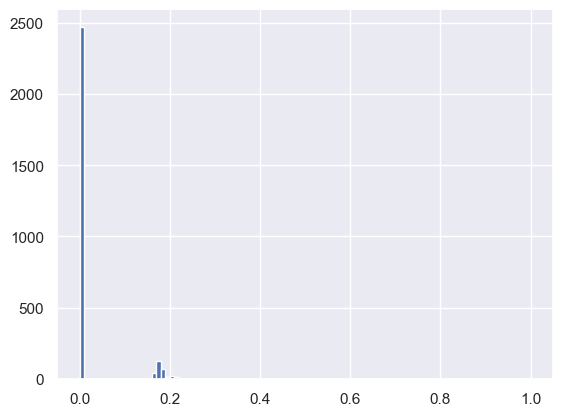

In [445]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 100)
# We plot a histogram of a variable with 100 bins.

(array([2.473e+03, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.660e+02, 7.800e+01, 3.400e+01, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 6.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

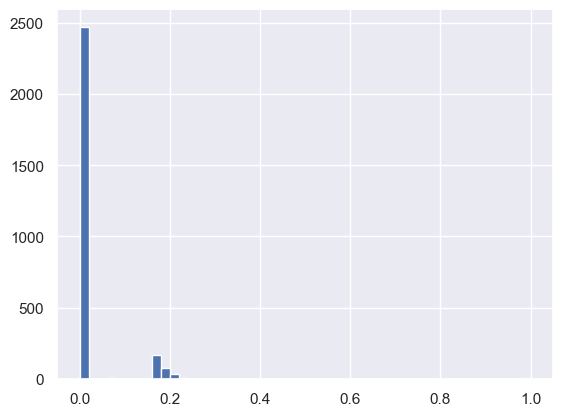

In [446]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
# We plot a histogram of a variable with 50 bins.

(array([  2.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          3.,   5.,   3.,   3.,   6.,  29.,  35.,  36., 110.,  67.,  97.,
         76.,  56., 195.,  53., 246., 222., 197., 384., 222., 376., 116.,
        219.]),
 array([0.042205  , 0.05178295, 0.0613609 , 0.07093885, 0.0805168 ,
        0.09009475, 0.0996727 , 0.10925065, 0.1188286 , 0.12840655,
        0.1379845 , 0.14756245, 0.1571404 , 0.16671835, 0.1762963 ,
        0.18587425, 0.1954522 , 0.20503015, 0.2146081 , 0.22418605,
        0.233764  , 0.24334195, 0.2529199 , 0.

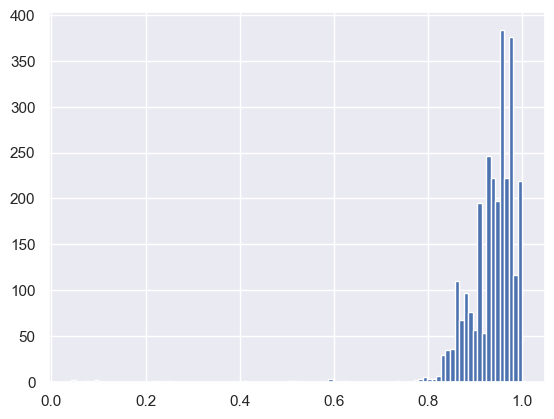

In [448]:
plt.hist(loan_data_defaults['CCF'], bins = 100)
# We plot a histogram of a variable with 100 bins.

In [449]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

In [450]:
loan_data_defaults['recovery_rate_0_1']

136692    0
141787    0
142644    0
146011    0
164645    0
165845    0
165912    0
165945    0
168626    0
168684    0
173117    0
175661    0
180051    0
181310    0
181328    0
184458    0
188569    0
189050    0
189329    0
190927    0
191004    0
193007    0
193650    0
193779    0
193808    0
195437    0
196211    0
196240    0
196335    0
199159    0
199362    0
199555    0
199708    0
199941    0
201143    0
202415    0
208148    0
209410    0
210157    0
211508    0
211643    0
211799    0
211874    0
212261    0
212679    0
213231    0
213369    0
214023    0
214770    0
215877    0
215936    0
216508    0
216582    0
216697    0
216709    0
216845    0
217092    0
217167    0
217662    0
218594    0
218863    0
218932    0
219446    0
219798    0
220078    0
220585    0
220600    0
220829    0
221059    0
221680    0
221972    0
222331    0
223099    0
224054    0
225025    0
225145    0
225267    0
225656    0
225765    0
225811    0
225953    0
225999    0
226193    0
2263

In [451]:
loan_data_defaults['recovery_rate_0_1'].sum()

306

In [452]:
len(loan_data_defaults['recovery_rate_0_1'])

2773

# LGD Model

## Splitting Data

In [453]:
from sklearn.model_selection import train_test_split

In [454]:
pd.options.display.max_columns = None

In [455]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

## Prepare the inputs

In [456]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'mths_since_earliest_cr_line',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [457]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [458]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [459]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis=1)

In [460]:
lgd_inputs_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
initial_list_status:w                  0
term_int                               0
emp_length_int                         0
mths_since_issue

### Estimating the Model

In [461]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [462]:
# w = [{0:1.0,1:1}, {0:1.0,1:2}, {0:1.0,1:3}, {0:1.0,1:4},
#     {0:1.0,1:5}, {0:1.0,1:6}, {0:1.0,1:7}, {0:1.0,1:8},
#     {0:1.0,1:9}, {0:1.0,1:10}, {0:1.0,1:11}, {0:1.0,1:12}, {0:1.0,1:13}, {0:1.0,1:14},
#     {0:1.0,1:15}, {0:1.0,1:16}, {0:1.0,1:17}, {0:1.0,1:18},
#     {0:1.0,1:19}, {0:1.0,1:20},
#     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
#     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}]
# crange = np.arange(0.5, 20.0, 0.5)
# hyperparam_grid = {"class_weight": w
#                   ,"penalty": ["none", "l2", "l1", "elasticnet"]
#                   ,"C": crange
#                   ,"fit_intercept": [True, False]  }

In [463]:
# from sklearn.model_selection import GridSearchCV
# reg_lgd = linear_model.LogisticRegression()

# grid = GridSearchCV(reg_lgd, hyperparam_grid, scoring="roc_auc", n_jobs=-1, refit= True)


# grid.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)
# print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [464]:
# reg_lgd_st_1 = LogisticRegression_with_p_values(class_weight= grid.best_params_['class_weight'],
#                                                penalty=grid.best_params_['penalty'],
#                                                C=grid.best_params_['C'],
#                                                fit_intercept=grid.best_params_['fit_intercept'] )

reg_lgd_st_1 = LogisticRegression_with_p_values(class_weight= {0:1,1:10})

reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

In [465]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [466]:
summary_table = pd.DataFrame(columns=['Feature name'], data= feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients  p_values
0                             Intercept  3.032652e-06       NaN
1                               grade:A -4.084610e-06  0.999995
2                               grade:B  2.451380e-06  0.999996
3                               grade:C  7.043900e-07  0.999999
4                               grade:D -6.798249e-06  0.999985
5                               grade:E  1.104261e-05  0.999972
6                               grade:F  4.071460e-07  0.999999
7               home_ownership:MORTGAGE -2.943510e-06  0.999976
8                    home_ownership:OWN  1.049307e-05  0.999944
9      verification_status:Not Verified -5.087973e-06  0.999968
10  verification_status:Source Verified  1.842874e-06  0.999986
11                          purpose:car -1.905847e-07  1.000000
12           purpose:debt_consolidation  1.997034e-06  0.999987
13             purpose:home_improvement  7.498627e-07  0.999997
14                        purpose:house  2.118975e-06  0.999997
15               purpose:major_purchase  2.183409e-07  0.999999
16                      purpose:medical  1.365478e-06  0.999997
17                       purpose:moving  2.806223e-07  0.999999
18                        purpose:other -9.526385e-07  0.999996
19             purpose:renewable_energy -2.259360e-07  1.000000
20               purpose:small_business -2.317524e-07  0.999999
21                     purpose:vacation  1.210044e-06  0.999998
22                initial_list_status:w -2.935772e-05  0.999748
23                             term_int -9.880438e-05  0.992130
24                       emp_length_int  2.653355e-05  0.998156
25                   mths_since_issue_d  2.861942e-04  0.989346
26                          funded_amnt -6.312534e-05  0.096561
27                             int_rate  1.111038e-04  0.997254
28                          installment  2.475280e-03  0.038704
29                           annual_inc -1.034716e-07  0.670276
30                                  dti -1.175446e-06  0.999820
31                          delinq_2yrs  8.625869e-07  0.999985
32                       inq_last_6mths  7.352405e-06  0.999870
33               mths_since_last_delinq -1.139247e-04  0.952968
34               mths_since_last_record  2.727697e-04  0.887899
35          mths_since_earliest_cr_line  1.240113e-04  0.815087
36                             open_acc -6.179785e-05  0.995709
37                              pub_rec -3.321068e-06  0.999972
38                            total_acc -1.421292e-05  0.997794
39                       acc_now_delinq  1.954482e-06  0.999996
40                     total_rev_hi_lim  8.060876e-07  0.645641

### Testing the Model

In [467]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [468]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

In [469]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [470]:
y_hat_test_lgd_stage_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [471]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [472]:
y_hat_test_proba_lgd_stage_1

array([[0.49120812, 0.50879188],
       [0.47497241, 0.52502759],
       [0.42333658, 0.57666342],
       ...,
       [0.49263733, 0.50736267],
       [0.48320332, 0.51679668],
       [0.47636452, 0.52363548]])

In [473]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]

In [474]:
y_hat_test_proba_lgd_stage_1

array([0.50879188, 0.52502759, 0.57666342, 0.51380234, 0.62967481,
       0.5194043 , 0.5672849 , 0.54726179, 0.61027623, 0.55668464,
       0.5773757 , 0.49889237, 0.49742528, 0.53099164, 0.56123966,
       0.47896762, 0.47506356, 0.49290119, 0.582637  , 0.63972752,
       0.56101198, 0.73815597, 0.55340806, 0.60248129, 0.56261403,
       0.56381134, 0.58303728, 0.57135061, 0.49283665, 0.51114342,
       0.58746471, 0.53912959, 0.53356378, 0.52721309, 0.53260908,
       0.60053231, 0.58728954, 0.65892933, 0.543262  , 0.53705079,
       0.58322697, 0.60593546, 0.61751722, 0.51862307, 0.55105464,
       0.4949553 , 0.53765579, 0.70407639, 0.56823836, 0.47674072,
       0.62418986, 0.58089795, 0.70171776, 0.51060213, 0.50915618,
       0.54268844, 0.59291017, 0.52744355, 0.77036404, 0.53910197,
       0.53980114, 0.48857486, 0.53503577, 0.56362608, 0.53283626,
       0.59135018, 0.55608864, 0.52791114, 0.61954438, 0.53825889,
       0.59809937, 0.58698059, 0.55057926, 0.47317955, 0.55357

In [475]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [476]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [477]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)

In [478]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [479]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

In [480]:
df_actual_predicted_probs.head()

lgd_targets_stage_1_test  y_hat_test_proba_lgd_stage_1
334903                         0                      0.508792
391743                         0                      0.525028
335984                         0                      0.576663
337769                         0                      0.513802
374650                         0                      0.629675

### Estimating the Аccuracy of the Мodel

In [481]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [482]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted   0    1
Actual            
0          64  434
1           1   56

In [483]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.115315  0.781982
1          0.001802  0.100901

In [484]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.21621621621621623

In [485]:
from sklearn.metrics import roc_curve, roc_auc_score

In [486]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

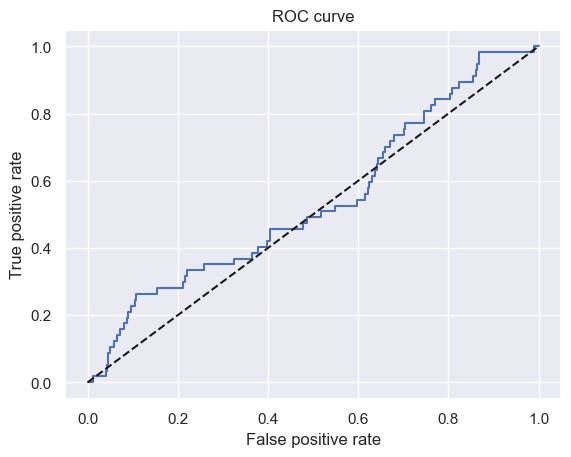

In [487]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [488]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.5404424716409498

### Saving the Model

In [489]:
import pickle

In [490]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1_2005.sav', 'wb'))

### Stage 2 – Linear Regression

In [491]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [492]:
lgd_stage_2_data.shape

(306, 192)

In [493]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [494]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [512]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = True # To allow sparse data
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.pinv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [496]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [497]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [513]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression()

In [514]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [515]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

Feature name  Coefficients  p_values
0                             Intercept -3.278782e-02       NaN
1                               grade:A  9.186139e-01     0.000
2                               grade:B  1.157230e-01     0.270
3                               grade:C  6.787711e-02     0.445
4                               grade:D  7.635728e-02     0.308
5                               grade:E  3.802497e-02     0.530
6                               grade:F  1.296709e-02     0.809
7               home_ownership:MORTGAGE  0.000000e+00     1.000
8                    home_ownership:OWN  0.000000e+00     1.000
9      verification_status:Not Verified  8.918055e-03     0.722
10  verification_status:Source Verified  0.000000e+00     1.000
11                          purpose:car  3.966760e-03     0.962
12           purpose:debt_consolidation  7.185742e-03     0.757
13             purpose:home_improvement  0.000000e+00     1.000
14                        purpose:house  1.056062e-02     0.865
15               purpose:major_purchase  1.449008e-01     0.005
16                      purpose:medical  1.941961e-02     0.690
17                       purpose:moving  1.403795e-02     0.840
18                        purpose:other  9.469136e-02     0.024
19             purpose:renewable_energy  0.000000e+00     1.000
20               purpose:small_business  7.681751e-03     0.899
21                     purpose:vacation  2.768909e-02     0.661
22                initial_list_status:w  0.000000e+00     1.000
23                             term_int  1.360337e-03     0.478
24                       emp_length_int  0.000000e+00     1.000
25                   mths_since_issue_d  0.000000e+00     1.000
26                          funded_amnt  0.000000e+00     1.000
27                             int_rate  4.364714e-03     0.500
28                          installment  0.000000e+00     1.000
29                           annual_inc  2.759558e-08     0.899
30                                  dti  0.000000e+00     1.000
31                          delinq_2yrs  3.176490e-03     0.720
32                       inq_last_6mths  3.424906e-04     0.965
33               mths_since_last_delinq  0.000000e+00     1.000
34               mths_since_last_record  0.000000e+00     1.000
35          mths_since_earliest_cr_line  0.000000e+00     1.000
36                             open_acc  0.000000e+00     1.000
37                              pub_rec  0.000000e+00     1.000
38                            total_acc  0.000000e+00     1.000
39                       acc_now_delinq  5.276323e-03     0.925
40                     total_rev_hi_lim  2.265579e-07     0.542

### Stage 2 – Linear Regression Evaluation

In [516]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [517]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)

In [518]:
lgd_inputs_stage_2_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:home_improvement',
       'purpose:house', 'purpose:major_purchase', 'purpose:medical',
       'purpose:moving', 'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'funded_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_earliest_cr_line', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [519]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [520]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [521]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)

In [522]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()

recovery_rate         0
recovery_rate       1.000000  0.313194
0                   0.313194  1.000000

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99865/483740359.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)


<Axes: xlabel='recovery_rate', ylabel='Density'>

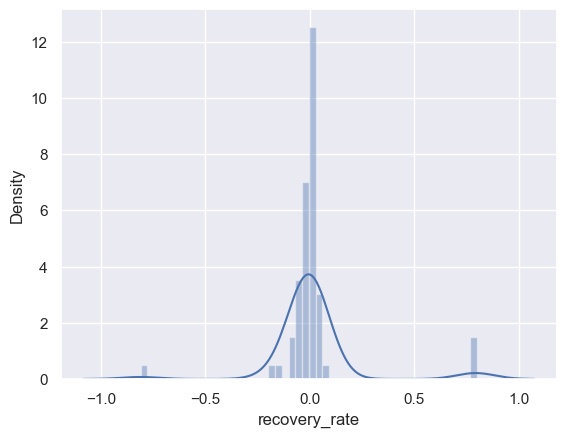

In [523]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [524]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2_2005.sav', 'wb'))

### Combining Stage 1 and Stage 2

In [525]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [526]:
y_hat_test_lgd_stage_2_all

array([0.30934486, 0.25760062, 0.18099235, 0.18698945, 0.17300823,
       0.19267281, 0.15075733, 0.19105728, 0.19623946, 0.19198641,
       0.17838052, 0.20536267, 0.20718717, 0.18952347, 0.15668435,
       0.22096078, 0.18238362, 0.32032125, 0.17917599, 0.15322954,
       0.18634082, 0.20019004, 0.14914514, 0.14742256, 0.17763918,
       0.32573903, 0.18848789, 0.18815219, 0.19598089, 0.21254286,
       0.19297604, 0.17739334, 0.1757293 , 0.17178842, 0.19447758,
       0.17226368, 0.17645364, 0.19021581, 0.16443963, 0.26354961,
       0.16329626, 0.24361088, 0.20366436, 0.19078959, 0.18394577,
       0.29598136, 0.19546101, 0.19400234, 0.16189371, 0.19819191,
       0.17028764, 0.15073387, 0.18105333, 0.18077383, 0.30130781,
       0.200613  , 0.20671304, 0.1943767 , 0.14987615, 0.19953578,
       0.17268959, 0.21287384, 0.16165313, 0.19879949, 0.18654451,
       0.18407109, 0.27070959, 0.27639598, 0.18459947, 0.97809003,
       0.15521421, 0.18585888, 0.14113459, 0.22071085, 0.18463

In [527]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [528]:
pd.DataFrame(y_hat_test_lgd).describe()

0
count  555.000000
mean     0.197927
std      0.170433
min      0.000000
25%      0.159570
50%      0.181685
75%      0.197972
max      1.140031

In [529]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [530]:
pd.DataFrame(y_hat_test_lgd).describe()

0
count  555.000000
mean     0.197466
std      0.168106
min      0.000000
25%      0.159570
50%      0.181685
75%      0.197972
max      1.000000